<a href="https://colab.research.google.com/github/natashanuto/CEE2/blob/main/trabalho_ce2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

O Airbnb transformou a forma como pessoas buscam e oferecem acomodações temporárias, impactando tanto o setor de turismo quanto o mercado imobiliário em grandes cidades. Este trabalho tem como objetivo analisar dados reais da plataforma, com foco específico na cidade de Barcelona, uma das principais capitais turísticas da Europa. Utilizando a linguagem Python, serão aplicadas técnicas de análise estatística, visualização de dados e modelagem preditiva, incluindo a construção de um modelo de regressão linear simples. Através dessa abordagem, busca-se entender os principais fatores que influenciam o preço das hospedagens e oferecer uma visão clara sobre a dinâmica do mercado de aluguel por temporada na cidade.

# Desenvolvimento

Inicialmente, é necessário obter uma visão geral das variáveis presentes no banco.

### Primeiras 5 linhas do banco:

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

banco = pd.read_csv('Barcelona.csv')

banco.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,179.0,1.0,45,2024-09-16,0.31,29.0,147.0,5,HUTB-002062;
1,"23197,""Forum CCIB DeLuxe, Spacious, Large Balc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,104.0,1.0,143,2025-03-04,0.86,3.0,107.0,31,HUTB-001722;
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Entire home/apt,157.0,31.0,25,2024-11-05,0.14,3.0,327.0,15,Exempt;
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,401.0,5.0,256,2025-02-02,1.46,3.0,191.0,34,HUTB-150671;



### Últimas 5 linhas do banco:

In [44]:
banco.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
19450,1366108822123777508,Habitacion Privada,413160011,Loucie And John,Gràcia,la Vila de Gràcia,41.399074,2.159820393393397,Private room,27.0,31.0,0,NaN,NaN,8.0,348.0,0,Exempt;
19451,1366453124999573764,Cozy Double Room in City Center,534870364,Juan,Eixample,la Dreta de l'Eixample,41.391440,2.17649,Private room,60.0,1.0,0,NaN,NaN,6.0,1.0,0,Exempt;
19452,1366459989694212599,140. Poble Sec Ent Apartment,396363,Alcam Apartments,Sants-Montjuïc,el Poble Sec,41.371550,2.15987,Entire home/apt,103.0,33.0,0,NaN,NaN,75.0,359.0,0,;
19453,1366500461965716620,Big Room with Work Desk - RDL0520003,518888520,David,Eixample,la Dreta de l'Eixample,41.392220,2.16825,Private room,31.0,32.0,0,NaN,NaN,98.0,278.0,0,;
19454,1366501139971684620,Your Boutique Mediterranean Stay in Barcelona,124887626,Ana,Eixample,la Sagrada Família,41.404897,2.1807924290537146,Entire home/apt,307.0,2.0,1,2025-03-05,1.0,1.0,51.0,1,HUTB-003778;



### Nomes das colunas, valores nulos e tipos de dados:

In [45]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19455 entries, 0 to 19454
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19455 non-null  object 
 1   name                            16643 non-null  object 
 2   host_id                         16643 non-null  object 
 3   host_name                       16636 non-null  object 
 4   neighbourhood_group             16643 non-null  object 
 5   neighbourhood                   16643 non-null  object 
 6   latitude                        16643 non-null  float64
 7   longitude                       16643 non-null  object 
 8   room_type                       16643 non-null  object 
 9   price                           13158 non-null  float64
 10  minimum_nights                  16643 non-null  float64
 11  number_of_reviews               16643 non-null  object 
 12  last_review                     

Com base nessas informações, obtêm-se uma noção preliminar dos dados a serem analisados. Primeiramente, o banco conta com 19422 linhas e 18 colunas. As variáveis observadas estão descritas a seguir:

|Variável     |Descrição         |Tipo           |
|-------------|------------------|---------------|
|`id`| Identificador único do anúncio | Categórica|
|`name`| Nome (título) do anúncio | Categórica |
|`host_id`| Identificador único do anfitrião | Categórica|
|`host_name`| Nome do anfitrião| Categórica |
|`neighbourhood_group`| Agrupamento de bairros| Categórica |
|`neighbourhood`| Bairro ou região onde o imóvel está localizado|  Catagórica |
|`latitude`| Latitude da localização do imóvel| Numérica |
|`longitude`| Longitude da localização do imóvel | Numérica |
|`room_type`| Tipo de acomodação | Categórica |
|`price`| Preço da diária em euros | Numérica |
|`minimun_nights`| Número mínimo de noites exigidas para reserva | Numérica |
|`number_of_reviews`| Quantidade total de avaliações recebidas pelo anúncio |Numérica |
|`last_review`| Data da última avaliação recebida (se houver) | Data |
|`reviews_per_month`| Média de avaliações recebidas por mês | Numérica |
|`calculated_host_listings_count `| Número de anúncios ativos do mesmo anfitrião | Numérica |
|`availability_365`| Número de dias no ano em que o imóvel está disponível para reserva | Numérica |
|`number_of_reviews_ltm`| ??????????| Binária |
|`license`| ???????????? | Categórica |

Os tipos das variáveis `id` e `host_id`, que são lidas como interos, devem ser corrigidos para string, tendo em vista que são variáveis identificadoras.

In [46]:
banco["id"] = banco["id"].astype(str)
banco["host_id"] = banco["host_id"].astype(str)

Em seguida, verifica-se a frequência absoluta e a porcentagem de valores nulos em cada coluna.

In [47]:
banco.isnull().sum()

,0
id,0
name,2812
host_id,0
host_name,2819
neighbourhood_group,2812
neighbourhood,2812
latitude,2812
longitude,2812
room_type,2812
price,6297


In [48]:
banco.isnull().mean() * 100

,0
id,0.000000
name,14.453868
host_id,0.000000
host_name,14.489848
neighbourhood_group,14.453868
neighbourhood,14.453868
latitude,14.453868
longitude,14.453868
room_type,14.453868
price,32.367001


As linhas com observações faltantes serão filtradas com base nas colunas que estiverem sendo utilizadas para análise.

A tabela a seguir fornece uma resumo das variáveis numéricas observadas:

In [49]:
round(banco.describe(), 2)

,latitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,16643.00,13158.00,16643.00,12352.00,16643.00,16643.00
mean,41.39,164.31,14.83,1.48,50.38,162.68
std,0.30,346.50,27.50,1.98,105.28,130.76
min,2.13,3.00,1.00,0.01,1.00,0.00
25%,41.38,65.00,1.00,0.22,2.00,1.00
50%,41.39,117.00,3.00,0.84,7.00,176.00
75%,41.40,181.00,31.00,2.22,35.00,281.00
max,41.46,10000.00,1124.00,79.12,483.00,365.00


Para o preço, que é a principal variável de interesse, foram observadas as seguintes medidas descritivas:

In [50]:
print("Média:", round(banco["price"].mean(), 2))
print("Mediana:", round(banco["price"].median(), 2))
print("Desvio padrão:", round(banco["price"].std(), 2))
print("Valor mínimo:", round(banco["price"].min(), 2))
print("Valor máximo:", round(banco["price"].max(), 2))

Média: 164.31
Mediana: 117.0
Desvio padrão: 346.5
Valor mínimo: 3.0
Valor máximo: 10000.0


Ademais, os gráficos abaixo permitem uma visualização mais detalhada da distribuição dessa variável.

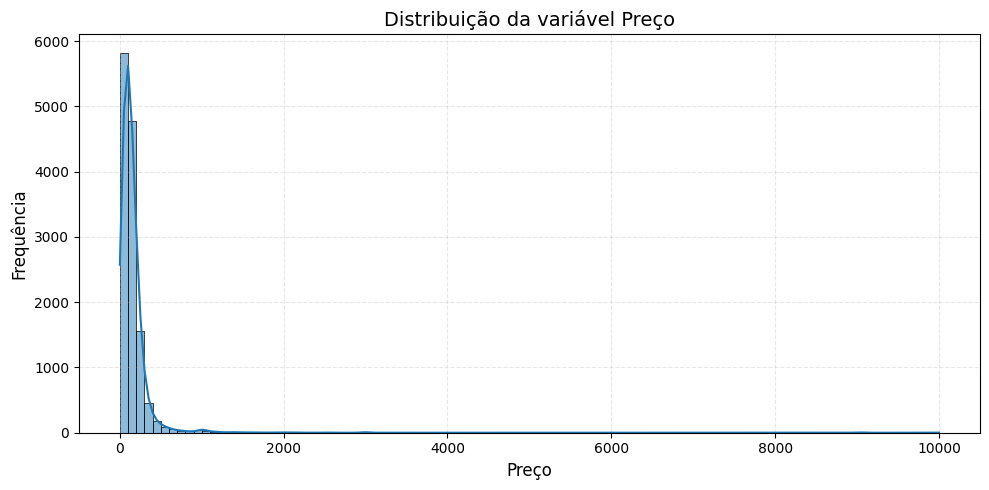

In [51]:
banco1 = banco[banco['price'].notna()]

plt.figure(figsize=(10, 5))
sns.histplot(banco1['price'], bins=100, kde=True)
plt.title('Distribuição da variável Preço', fontsize=14)
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

O gráfico revela uma distribuição fortemente assimétrica à direita, característica comum em contextos econômicos, como preços de produtos ou serviços. O histograma mostra que a grande maioria dos dados está concentrada em valores baixos, abaixo de 1000 euros, enquanto uma pequena parcela de observações apresenta valores muito elevados, formando uma cauda longa à direita. Essa distribuição indica a presença de outliers que podem influenciar medidas como a média, tornando-a maior do que a mediana.

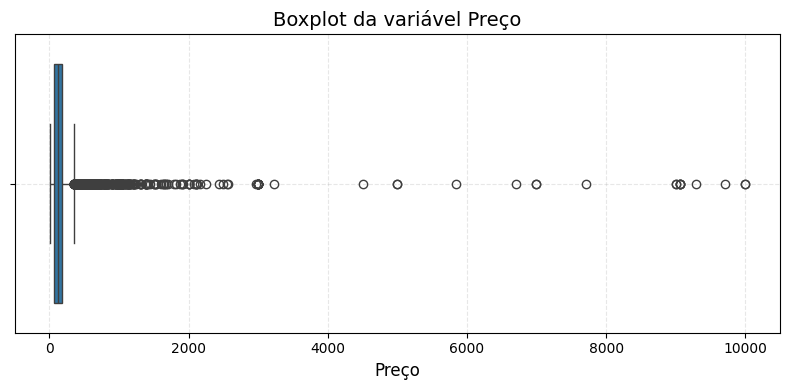

In [52]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=banco1['price'])
plt.title('Boxplot da variável Preço', fontsize=14)
plt.xlabel('Preço', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

O boxplot reforça o comportamento apresentado no histograma, evidenciando uma grande quantidade de valores atípicos acima do terceiro quartil. A mediana está situada próxima ao limite inferior da caixa, indicando que pelo menos 50% dos dados possuem preços relativamente baixos. Os muitos círculos acima da caixa representam observações fora do limite superior, confirmando a existência de uma cauda longa e uma alta dispersão nos dados. Os outliers detectados indicam que existe uma parcela pequena de hospedagens com preços extremamente elevados.

### Análise de Preço por Bairro


Nesta seção, analisam-se os preços médios das acomodações por bairro. A tabela a seguir apresenta os bairros com os menores e maiores valores médios de hospedagem, seguidos por uma visualização gráfica.

In [53]:
precos = banco1.groupby("neighbourhood")["price"].mean().sort_values()
precos = precos[precos > 5]
precos = precos.reset_index()
precos.columns = ['Bairro', 'Preço Médio']
display(precos)

,Bairro,Preço Médio
0,el Turó de la Peira,38.461538
1,Can Peguera,48.000000
2,la Vall d'Hebron,49.000000
3,la Trinitat Nova,50.666667
4,la Prosperitat,55.058824
...,...,...
63,la Vila Olímpica del Poblenou,252.475248
64,Navas,259.000000
65,Diagonal Mar i el Front Marítim del Poblenou,287.725191
66,Sants - Badal,321.315789


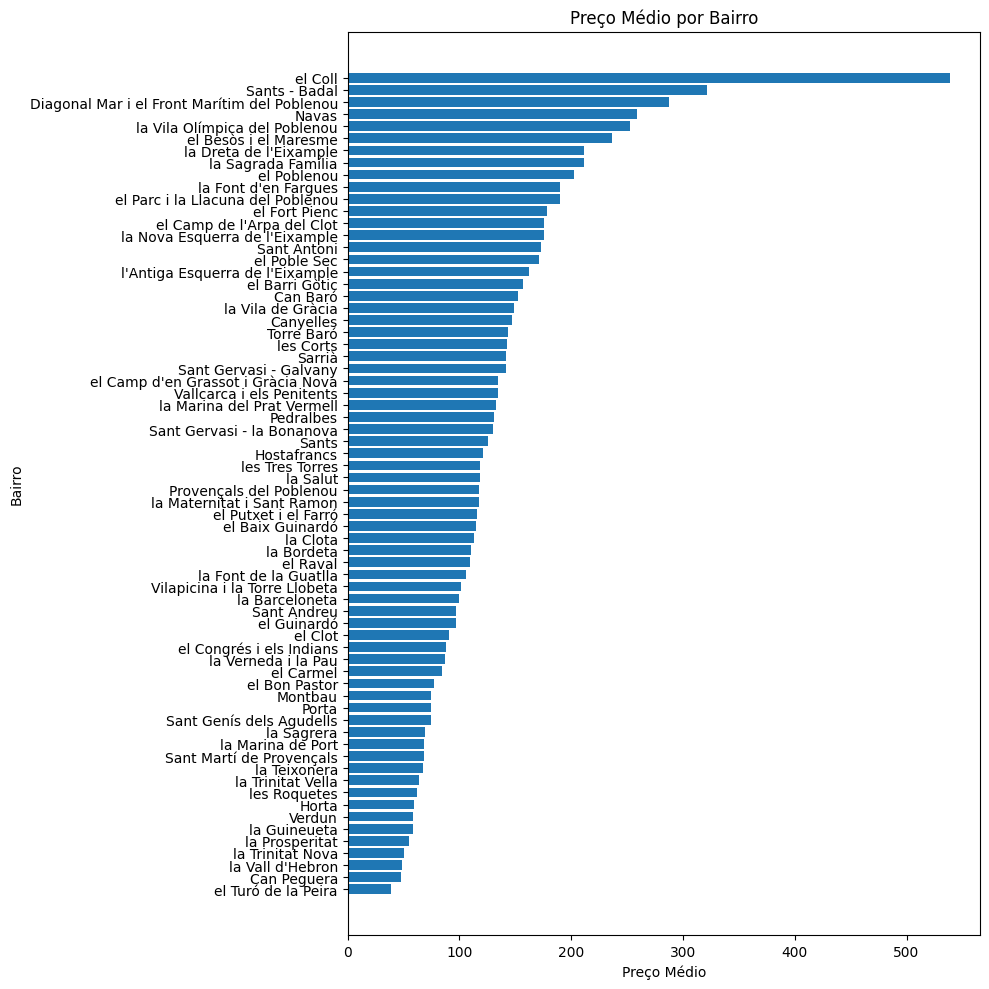

In [54]:
plt.figure(figsize=(10, 10))
plt.barh(precos['Bairro'], precos['Preço Médio'])
plt.xlabel('Preço Médio')
plt.ylabel('Bairro')
plt.title('Preço Médio por Bairro')
plt.tight_layout()
plt.show()

Com base na tabela e no gráfico, observa-se que o bairro com maior preço médio de hospedagem é el Coll, com 538,76 euros, enquanto o bairro com o menor preço médio é el Turó de la Peira, com 38,46 euros.

A diferença entre os extremos é notável, ultrapassando 500 euros, o que evidencia a desigualdade nos preços médios entre as regiões. Nota-se também que el Coll se destaca de forma significativa em relação aos demais bairros: mesmo o segundo bairro mais caro, Sants - Badal, apresenta um valor médio cerca de 200 euros inferior.

### Visualização Georgráfica

In [55]:
from IPython.display import HTML
import folium

def mostrar_mapa(mapa, largura=500, altura=400):
    html = mapa.get_root().render()
    display(HTML(f'<div style="width:{largura}px; height:{altura}px;">{html}</div>'))

mapa = folium.Map(location = [41.38328994080733, 2.1786172649806925],
                  zoom_start = 13.5,
                  control_scale= True,
                  width = 500,
                  height = 400)

### Análise de Relação entre Variáveis

Nesta seção, busca-se compreender como algumas variáveis numéricas se relacionam com o preço das diárias dos anúncios. Para isto, foram selecionadas as seguintes variáveis: _reviews_per_month_ (média de avaliações recebidas por mês), _availability_365_ (número de dias no ano em que o imóvel está disponível) e _calculated_host_listings_count_ (quantidade de anúncios ativos por anfitrião).


A análise foi realizada por meio de gráficos de dispersão, das respectivas variáveis e a variável preço. Em seguida, foi elaborado um mapa de correlação com a função heatmap, com o objetivo de identificar a intesidade das correlações lineares entre as variáveis selecionadas e o preço.

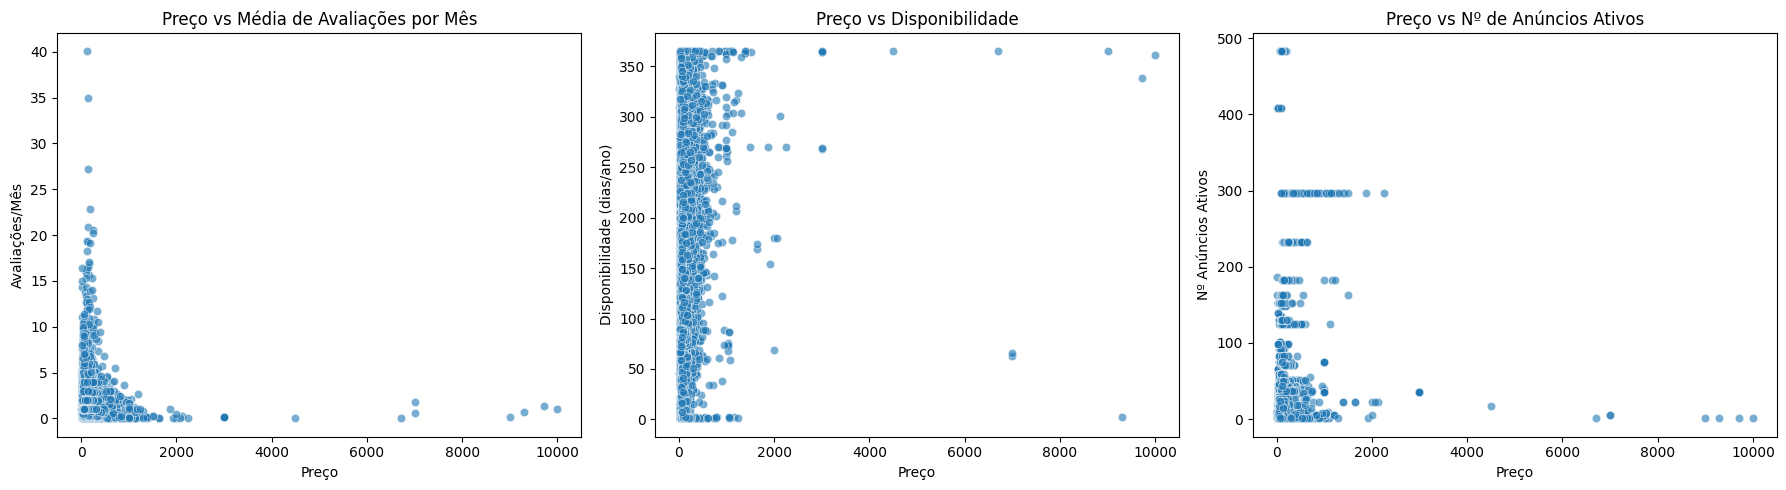

In [66]:
import seaborn as sns

variaveis = ['price', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']
banco2 = banco[variaveis].dropna()
banco2 = banco2[(banco2 != 0).all(axis=1)]

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.scatterplot(data=banco2, x="price", y="reviews_per_month", alpha=0.6)
plt.title("Preço vs Média de Avaliações por Mês")
plt.xlabel("Preço")
plt.ylabel("Avaliações/Mês")


plt.subplot(1, 3, 2)
sns.scatterplot(data=banco2, x="price", y="availability_365", alpha=0.6)
plt.title("Preço vs Disponibilidade")
plt.xlabel("Preço")
plt.ylabel("Disponibilidade (dias/ano)")


plt.subplot(1, 3, 3)
sns.scatterplot(data=banco2, x="price", y="calculated_host_listings_count", alpha=0.6)
plt.title("Preço vs Nº de Anúncios Ativos")
plt.xlabel("Preço")
plt.ylabel("Nº Anúncios Ativos")

plt.tight_layout()
plt.show()

Os gráficos de dispersão revelam que a maior parte dos dados está concentrada predominantemente abaixo de 2.000 euros. Observa-se, contudo, a presença de valores extremos, com preços que ultrapassam os 8.000 e até mesmo os 10.000 euros, distorcendo a escala do gráfico.

No gráfico __“Preço vs Média de Avaliações por Mês”__, nota-se que os anúncios com maior número de avaliações mensais tendem a apresentar preços mais acessíveis. Por outro lado, os anúncios com preços elevados, em sua maioria, possuem poucas ou nenhuma avaliação mensal.

No gráfico __“Preço vs Disponibilidade”__, a variável disponibilidade apresenta uma distribuição bastante dispersa ao longo do intervalo de 0 a 365 dias. Apesar disso, a maioria dos preços permanece concentrada abaixo de 2.000 euros. É possível identificar alguns imóveis com preços elevados e alta disponibilidade.

No gráfico __“Preço vs Nº de Anúncios Ativos"__, observa-se que a maioria dos anfitriões possui abaixo de 200 anúncios ativos e preços abaixo de 2.000 euros. Destaca-se ainda a concentração de dados em valores específicos de 300 anúncios, o que pode indicar algum tipo de arredondamento.

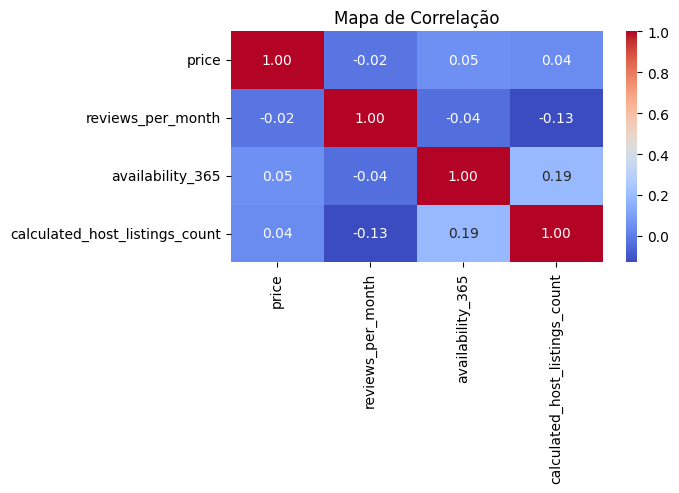

In [57]:
banco_dummies = pd.get_dummies(banco2)
corr = banco_dummies[['price', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']].corr()

plt.figure(figsize=(6, 3))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação")
plt.show()

O mapa de correlação indica que os coeficientes entre a variável preço e as demais variáveis analisadas são muito próximos de zero, o que sugere uma correlação linear fraca ou inexistente entre elas. Em outras palavras, não há uma relação linear significativa entre o preço e as variáveis selecionadas.

Destaca-se apenas a correlação positiva entre as variáveis _availability_365_ (disponibilidade anual) e _calculated_host_listings_count_ (número de anúncios ativos do host), cujo coeficiente é 0,19. Embora esse valor ainda seja considerado baixo, é o maior dentre os apresentados.

### Modelagem Estatística: Regressão Linear Simples

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.express as px

banco_clean = banco.dropna(subset=['reviews_per_month', 'price'])

# Preparar os dados novamente
X = banco_clean['reviews_per_month'].values.reshape(-1, 1) # Coeficiente mais relevante pra resposta
X2 = banco_clean['availability_365'].values.reshape(-1, 1)
X3 = banco_clean['number_of_reviews'].values.reshape(-1, 1)
X4 = banco_clean['calculated_host_listings_count'].values.reshape(-1, 1)
#X5 = banco_clean['minimun_nights'].values.reshape(-1, 1)

y = banco_clean['price']

# Instanciar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(X, y)

# Coletando os coeficientes da regressão
intercepto = modelo.intercept_  # Intercepto (valor de y quando X = 0)
inclinacao = modelo.coef_[0]   # Inclinação (coeficiente da variável X)

Intercepto (b0): 165.87
Inclinação (b1): -2.93




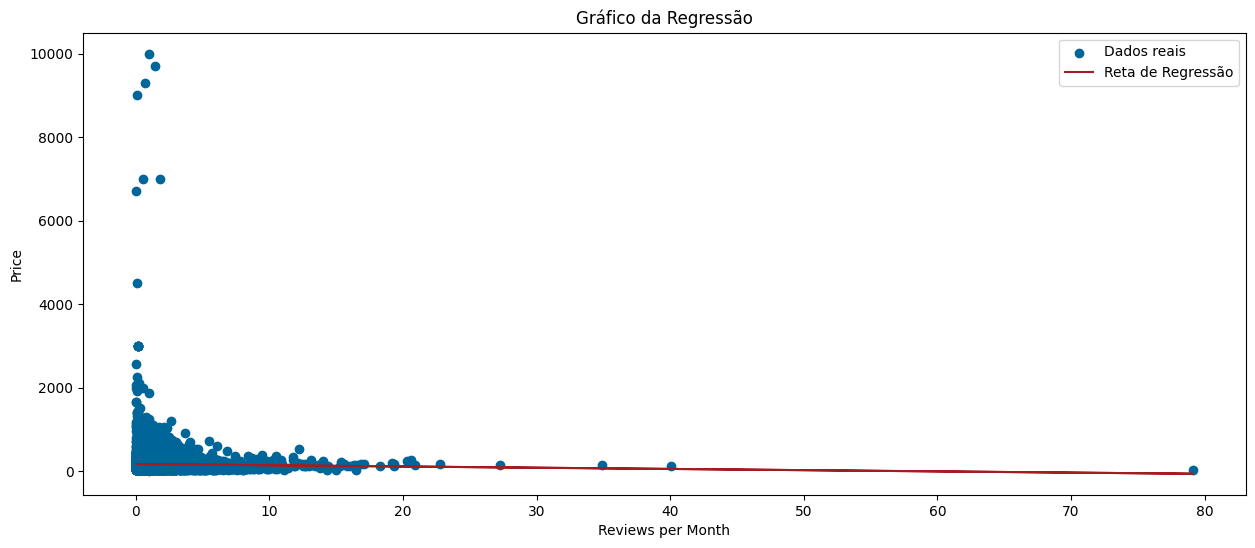

In [59]:
# Resultados



# Exibindo os coeficientes
print(f'Intercepto (b0): {round(intercepto, 2)}')
print(f'Inclinação (b1): {round(inclinacao, 2)}')

print('\n')
# Gerar previsões com o modelo ajustado
y_pred = modelo.predict(X)

plt.figure(figsize=(15, 6))

# Plotando o gráfico de dispersão dos dados reais
plt.scatter(X, y, color='#006699', label='Dados reais')


# Plotando a linha de regressão
plt.plot(X, y_pred, color='#a11d21', label='Reta de Regressão')

# Adicionando título e rótulos
plt.title("Gráfico da Regressão")
plt.xlabel("Reviews per Month")
plt.ylabel("Price")

# Exibindo a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

Observando o modelo ajustado, vemos que a quantidade de avaliações por mês que um anúncio possui influencia negativamente o seu preço.

Interpretando os coeficientes, temos indícios de que, para cada unidade a mais de número de avaliações por mês que um anúncio recebe, o seu valor decresce em aproximadamente **U\$1.63**. Quando não conta com nenhuma avaliação por mês, estima-se que a média de preço do aluguel é de **U$160.94**.

### Visualizações Avançadas

A seguir, estão dispostas formas de visualizações interativas dos dados disponíveis no banco. A geração dos gráficos se fez por meio da biblioteca ***Plotly***.

In [60]:
# Gráfico de dispersão interativo
fig = px.scatter(
    banco_clean,
    x="reviews_per_month",
    y="price",
    color="neighbourhood_group",
    size="calculated_host_listings_count",
    hover_data=["host_name"],
    title="Gráfico de Dispersão Interativo do Preço pelos Reviews por Mês"
)

fig.show()

Com o gráfico de dispersão interativo acima, conseguimos avaliar com mais detalhes a regressão traçada anteriormente. Análises podem ser feitas acerca dos bairros, representados pelas cores das bolinhas, e sobre o número de anúncios ativos do mesmo anfitrião, representado pelo tamanho de cada bolinha.

In [61]:
fig = px.histogram(
    banco_clean,
    x="price",
    nbins=5000,
    color="neighbourhood_group",
    barmode="overlay",
    opacity=0.7,
    title="Histograma Interativo do Preço por Bairro"
)

fig.show()

Com o histograma acima, temos uma visualização ainda mais simplificada da distribuição de preço por bairro. Explorando o gráfico, conseguimos identificar que bairros como a Ciutat Vella concentra um maior número de hospedagens abaixo de U\$100.00, enquanto o Eixample, por exemplo, apresenta boa variedade de opções até cerca de U\$250.00.

In [62]:
# Contar frequências
freq = banco_clean["neighbourhood"].value_counts().reset_index()
freq.columns = ["bairro", "frequencia"]

In [63]:
coordenadas = pd.DataFrame({
    "bairro": [
        "la Dreta de l'Eixample",
        "el Raval",
        "la Sagrada Família",
        "el Barri Gòtic",
        "la Vila de Gràcia",
        "Sant Pere, Santa Caterina i la Ribera",
        "l'Antiga Esquerra de l'Eixample",
        "Sant Antoni",
        "el Poble Sec",
        "la Nova Esquerra de l'Eixample",
        "el Fort Pienc",
        "el Poblenou",
        "la Barceloneta",
        "Sant Gervasi - Galvany",
        "Sants",
        "el Camp de l'Arpa del Clot",
        "el Camp d'en Grassot i Gràcia Nova",
        "les Corts",
        "Hostafrancs",
        "el Parc i la Llacuna del Poblenou",
        "Sants - Badal",
        "el Putxet i el Farró",
        "Diagonal Mar i el Front Marítim del Poblenou",
        "el Baix Guinardó",
        "la Vila Olímpica del Poblenou",
        "el Guinardó",
        "la Font de la Guatlla",
        "el Besòs i el Maresme",
        "el Carmel",
        "Provençals del Poblenou",
        "la Maternitat i Sant Ramon",
        "el Clot",
        "Vallcarca i els Penitents",
        "la Bordeta",
        "Sarrià",
        "Sant Andreu",
        "Sant Gervasi - la Bonanova",
        "la Sagrera",
        "Sant Martí de Provençals",
        "Navas",
        "la Marina de Port",
        "la Salut",
        "Vilapicina i la Torre Llobeta",
        "el Congrés i els Indians",
        "les Tres Torres",
        "Can Baró",
        "la Verneda i la Pau",
        "el Coll",
        "Vallvidrera, el Tibidabo i les Planes",
        "Porta",
        "Pedralbes",
        "el Turó de la Peira",
        "Horta",
        "la Prosperitat",
        "la Teixonera",
        "les Roquetes",
        "la Guineueta",
        "la Font d'en Fargues",
        "Sant Genís dels Agudells",
        "la Marina del Prat Vermell",
        "el Bon Pastor",
        "la Vall d'Hebron",
        "la Trinitat Vella",
        "Verdun",
        "Montbau",
        "la Clota",
        "Can Peguera",
        "la Trinitat Nova",
        "Torre Baró",
        "Canyelles"
    ],
    "latitude": [
        41.3935, 41.3804, 41.4036, 41.3839, 41.4023, 41.3868, 41.3850, 41.3799,
        41.3734, 41.3830, 41.3977, 41.4041, 41.3793, 41.3994, 41.3753, 41.4113,
        41.4067, 41.3869, 41.3751, 41.3986, 41.3731, 41.4076, 41.4106, 41.4135,
        41.3906, 41.4215, 41.3699, 41.4159, 41.4212, 41.4088, 41.3813, 41.4101,
        41.4159, 41.3689, 41.4008, 41.4333, 41.4062, 41.4220, 41.4119, 41.4150,
        41.3586, 41.4121, 41.4295, 41.4261, 41.3984, 41.4178, 41.4243, 41.4135,
        41.4185, 41.4374, 41.3854, 41.4294, 41.4319, 41.4379, 41.4202, 41.4432,
        41.4412, 41.4223, 41.4254, 41.3536, 41.4446, 41.4229, 41.4481, 41.4364,
        41.4268, 41.4279, 41.4385, 41.4486, 41.4534, 41.4361
    ],
    "longitude": [
        2.1639, 2.1699, 2.1744, 2.1760, 2.1561, 2.1801, 2.1569, 2.1596,
        2.1634, 2.1489, 2.1800, 2.2043, 2.1911, 2.1467, 2.1376, 2.1824,
        2.1650, 2.1314, 2.1499, 2.1932, 2.1349, 2.1412, 2.2187, 2.1676,
        2.1978, 2.1696, 2.1453, 2.2189, 2.1583, 2.2067, 2.1250, 2.1882,
        2.1482, 2.1399, 2.1234, 2.1909, 2.1371, 2.1859, 2.1973, 2.1836,
        2.1374, 2.1569, 2.1709, 2.1790, 2.1280, 2.1669, 2.2052, 2.1450,
        2.1129, 2.1775, 2.1163, 2.1667, 2.1590, 2.1756, 2.1506, 2.1669,
        2.1715, 2.1651, 2.1516, 2.1334, 2.1961, 2.1469, 2.1916, 2.1667,
        2.1415, 2.1561, 2.1612, 2.1829, 2.1767, 2.1689
    ]
})

In [64]:
# Merge pelas colunas de bairro
dados_mapa = pd.merge(coordenadas, freq, on="bairro", how="left")

# Se algum bairro não apareceu, preencher frequência como 0
dados_mapa["frequencia"] = dados_mapa["frequencia"].fillna(0)

# Ajustando o tamanho das bolinhas
dados_mapa["tamanho_bolinhas"] = ((1+(dados_mapa["frequencia"])/1572))*2000

# Ajustando as labels pro mapa
dados_mapa["Hospedagens Disponíveis "] = " " + dados_mapa["frequencia"].astype(int).astype(str)

In [65]:
fig = px.scatter_mapbox(
    dados_mapa,
    lat="latitude",
    lon="longitude",
    size="tamanho_bolinhas",
    color="frequencia",
    hover_name="bairro",
    hover_data={"frequencia": False,
                "Hospedagens Disponíveis ": True,
                "latitude": False,
                "longitude": False,
                "tamanho_bolinhas": False},
    zoom=11,
    height=600,
    title="Hospedagens Disponíveis por Bairro em Barcelona"
)

# Configuração de mapa
fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":40,"l":0,"b":0}
)

fig.show()

O gráfico de mapa interativo acima se mostrou, talvez, como o mais interessante! Com ele, é possível visualizar com facilidade a quantidade de hospedagens disponíveis em cada bairro de Barcelona. Nota-se uma concentração bem definida em torno do que pode ser considerado o centro da cidade, o Eixample, que define o pico de hospedagens disponíveis com 1572.

Percebe-se ainda que, em média, quanto mais se afasta deste centro, menos hospedagens disponíveis são encontradas.

# Conclusão

  Analisando o relatório completo, podemos concluir que a cidade de Barcelona apresenta uma variedade excelente de hospedagens a diferentees preços. Mesmo que sua grande maioria esteja concentrada entre valores em torno de 60 a 180 dólares por noite, opções de maior luxo estão disponíveis para diversos bairros da cidade catalã.

  Observando a análise de regressão contida no relatório e o teste de outras covariáveis disponíveis no banco, nota-se que a principal característica que parece influenciar no preço da hospedagem é o número médio de avaliações recebidas por mês. Pode-se especular que, por conta do maior valor, menos pessoas têm capacidade financeira de arcar com a hospedagem e, por isso, menos avaliações são registradas.

  Para além disso, vale notar a alta concentração de anúncios disponíveis em torno de um centro da cidade bem definido, tangenciando a região da Ciutat Vella e o Eixample. Quanto mais distante desses bairros, e naturalmente das principais atrações turísticas de Barcelona, como la Sagrada Familia, las Ramblas e as principais obras de Gaudí, menos hospedagens estão disponíveis no Airbnb.